## Exercise 6- Support Vector Machines & Spam Classification

In [25]:
# import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 
import scipy.optimize 
from sklearn import svm # SVM library

#### SVM with Linear Kernels

In [26]:
# dataset 1
input_file = 'database/ex6data1.mat'

# scipy.io for loading .mat files
mat_data = scipy.io.loadmat(input_file)
X, y = mat_data['X'], mat_data['y']

# No need to insert x0 as SVM takes care of it 

# dividing the data as per ones and zeros
positive = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
negative = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

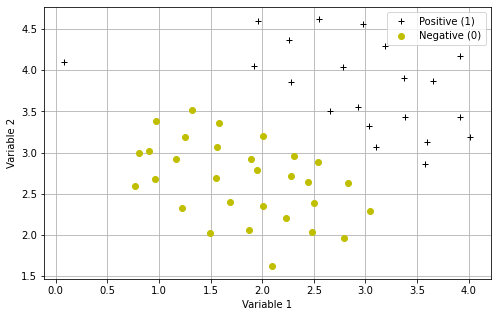

In [27]:
def plotData():
    plt.figure(figsize=(8,5))
    plt.plot(positive[:,0],positive[:,1],'k+',label='Positive (1)')
    plt.plot(negative[:,0],negative[:,1],'yo',label='Negative (0)')
    plt.xlabel('Variable 1')
    plt.ylabel('Variable 2')
    plt.legend()
    plt.grid(True)
    
plotData()

In [28]:
# function for drawing the SVM boundary
def plotBoundary(_svm, xmin, xmax, ymin, ymax):
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(_svm.predict([np.array([xvals[i],yvals[j]])]))
    zvals = zvals.transpose()

    u, v = np.meshgrid(xvals, yvals)
    mycontour = plt.contour(xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")

<ipython-input-28-829f36f0da94>:12: UserWarning: No contour levels were found within the data range.
  mycontour = plt.contour(xvals, yvals, zvals, [0])
<ipython-input-28-829f36f0da94>:12: UserWarning: No contour levels were found within the data range.
  mycontour = plt.contour(xvals, yvals, zvals, [0])


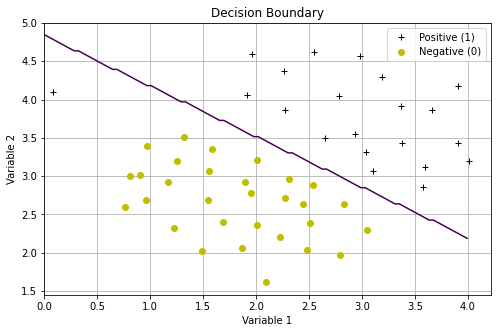

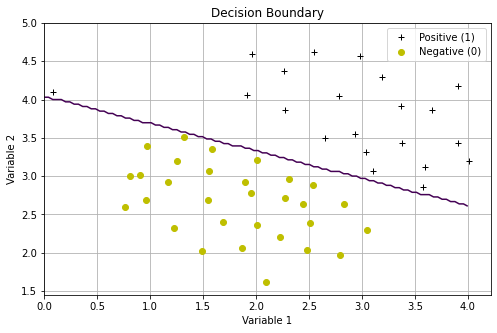

In [29]:
# running the SVM training with C = 1 and C = 100 using SVM library 
# C = 1 (gives a natural looking boundary)
linear_svm = svm.SVC(C=1, kernel='linear')
linear_svm.fit(X, y.flatten())
plotData()
plotBoundary(linear_svm,0,4,2,5)

# C = 100 (the boundary looks forced)
linear_svm = svm.SVC(C=100, kernel='linear')
linear_svm.fit( X, y.flatten() )
plotData()
plotBoundary(linear_svm,0,4,2,5)

#### SVM with Gaussian Kernels

In [30]:
# Reference- http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html
def gaussianKernel(x1, x2, sigma):
    sigma_squared = np.power(sigma,2)
    return np.exp(-(x1-x2).T.dot(x1-x2)/(2*sigma_squared))

print(gaussianKernel(np.array([1, 2, 1]),np.array([0, 4, -1]), 2.))

0.32465246735834974


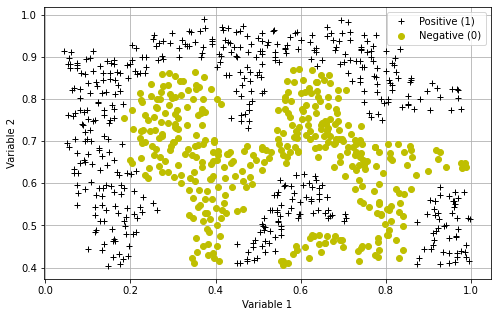

In [31]:
# dataset 2
input_file = 'database/ex6data2.mat'

# scipy.io for loading .mat files
mat_data = scipy.io.loadmat(input_file)
X, y = mat_data['X'], mat_data['y']

# No need to insert x0 as SVM takes care of it 

# dividing the data as per ones and zeros
positive = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
negative = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

plotData()

<ipython-input-28-829f36f0da94>:12: UserWarning: No contour levels were found within the data range.
  mycontour = plt.contour(xvals, yvals, zvals, [0])
<ipython-input-28-829f36f0da94>:12: UserWarning: No contour levels were found within the data range.
  mycontour = plt.contour(xvals, yvals, zvals, [0])
<ipython-input-28-829f36f0da94>:12: UserWarning: No contour levels were found within the data range.
  mycontour = plt.contour(xvals, yvals, zvals, [0])


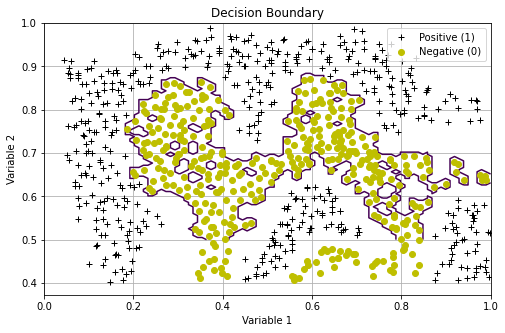

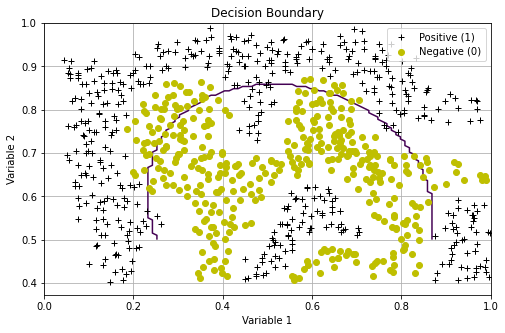

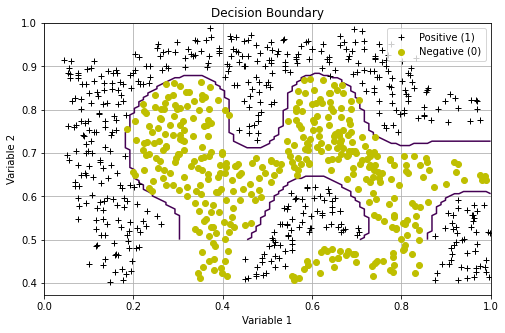

In [32]:
# training the SVM with the Gaussian kernel
# at sigma = 0.01 (overfitting)
sigma = 0.01
gamma = np.power(sigma,-2.)
gaussian_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaussian_svm.fit(X, y.flatten())
plotData()
plotBoundary(gaussian_svm,0,1,.5,1)

# at sigma = 1 (underfitting)
sigma = 1
gamma = np.power(sigma,-2.)
gaussian_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaussian_svm.fit(X, y.flatten())
plotData()
plotBoundary(gaussian_svm,0,1,.5,1)

# at sigma = 0.1 (perfect fit)
sigma = 0.1
gamma = np.power(sigma,-2.)
gaussian_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaussian_svm.fit(X, y.flatten())
plotData()
plotBoundary(gaussian_svm,0,1,.5,1)

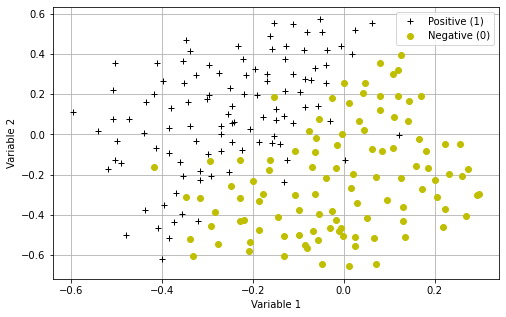

In [33]:
# dataset 3
input_file = 'database/ex6data3.mat'

# scipy.io for loading .mat files
mat_data = scipy.io.loadmat(input_file)
X, y = mat_data['X'], mat_data['y']
Xval, yval = mat_data['Xval'], mat_data['yval']

# No need to insert x0 as SVM takes care of it 

# dividing the data as per ones and zeros
positive = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
negative = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

plotData()

In [34]:
# determining the best C and σ
# score() function for a trained SVM takes in X and y to test the score on, returns mean accuracy

C_values = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigma_values = C_values
best_pair, best_score = (0, 0), 0

for C in C_values:
    for sigma in sigma_values:
        gamma = np.power(sigma,-2.)
        gaussian_svm = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        gaussian_svm.fit(X, y.flatten())
        current_score = gaussian_svm.score(Xval,yval)
        if current_score > best_score:
            best_score = current_score
            best_pair = (C, sigma)
            
print ("Best (C, Sigma) = (%.2f, %.2f)\nScore = %.4f"%(best_pair[0],best_pair[1],best_score))

Best (C, Sigma) = (0.30, 0.10)
Score = 0.9650


<ipython-input-28-829f36f0da94>:12: UserWarning: No contour levels were found within the data range.
  mycontour = plt.contour(xvals, yvals, zvals, [0])


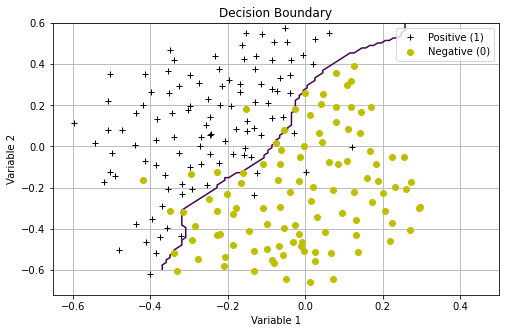

In [35]:
gaussian_svm = svm.SVC(C=best_pair[0], kernel='rbf', gamma = np.power(best_pair[1],-2.))
gaussian_svm.fit(X, y.flatten())
plotData()
plotBoundary(gaussian_svm,-.5,.5,-.6,.6)

### Spam Classification

In [36]:
# import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 
import scipy.optimize 
from sklearn import svm # SVM library
import re
import nltk, nltk.stem.porter

In [37]:
# displaying the sample emails
with open ('database/emailSample1.txt') as f:
    emails = f.readlines()

emails

['> Anyone knows how much it costs to host a web portal ?\n',
 '>\n',
 "Well, it depends on how many visitors you're expecting.\n",
 'This can be anywhere from less than 10 bucks a month to a couple of $100. \n',
 'You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \n',
 'if youre running something big..\n',
 '\n',
 'To unsubscribe yourself from this mailing list, send an email to:\n',
 'groupname-unsubscribe@egroups.com\n',
 '\n']

In [38]:
# preprocessing function
def preProcess( email ):
    # lowercase conversion
    email = email.lower() 
    # removing HTML tags
    email = re.sub('<[^<>]+>', ' ', email);
    # replacing numbers with the string 'number'
    email = re.sub('[0-9]+', 'number', email)
    # replacing anything starting with http or https:// with 'httpaddr'
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email)
    # strings with "@" in the middle are considered emails --> 'emailaddr'
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email);
    # replacing '$' sign gets with 'dollar'
    email = re.sub('[$]+', 'dollar', email);
    
    return email

In [39]:
# function for tokenizing clean emails
def email_toTokenList( raw_email ):
    # using the Porter stemmer to stem the word
    stemmer = nltk.stem.porter.PorterStemmer()
    email = preProcess(raw_email)
    
    # splitting by many delimiters using re.split()
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]', email)
    # looping over each token and using a stemmer to shorten it,
    # checking if the word is in the vocab_list
    # if yes, store index value in the vocab_list
    token_list = []
    for token in tokens:
        # removing any non alphanumeric characters
        token = re.sub('[^a-zA-Z0-9]', '', token);
        stemmed_token = stemmer.stem(token)
        # removing empty tokenz
        if not len(token):
            continue
            
        # store a list of all unique stemmed words
        token_list.append(stemmed_token)
            
    return token_list

In [40]:
# getting the vocabulary
def getVocabDict(reverse=False):
    vocab_dict = {}
    with open("database/vocab.txt") as f:
        for line in f:
            (val, key) = line.split()
            if not reverse:
                vocab_dict[key] = int(val)
            else:
                vocab_dict[int(val)] = key
                
    return vocab_dict

In [41]:
def email_toVocabIndices(raw_email, vocab_dict):
    """
    Function that takes in a raw email and returns a list of indices corresponding
    to the location in vocab_dict for each stemmed word in the email.
    """
    token_list = email_toTokenList(raw_email)
    index_list = [vocab_dict[token] for token in token_list if token in vocab_dict ]
    return index_list

In [42]:
# extracting features from the email
def email_toFeatureVector(raw_email, vocab_dict):
    """
    Function that takes as input a raw email, and returns a vector of shape
    (n,1) where n is the size of the vocab_dict.
    The first element in this vector is 1 if the vocab word with index == 1
    is in the raw_email, 0 otherwise.
    """
    n = len(vocab_dict)
    result = np.zeros((n,1))
    vocab_indices = email_toVocabIndices(raw_email, vocab_dict)
    for idx in vocab_indices:
        result[idx] = 1
    return result

In [43]:
vocab_dict = getVocabDict()
email_contents = open('database/emailSample1.txt', 'r').read()
test_fv = email_toFeatureVector(email_contents, vocab_dict)

print("Length of feature vector = %d" % len(test_fv))
print("Number of non-zero entries = %d" % sum(test_fv==1))

Length of feature vector = 1899
Number of non-zero entries = 45


In [44]:
# training the SVM for spam classification
# training set
input_file = 'database/spamTrain.mat'
mat_data = scipy.io.loadmat(input_file)
X, y = mat_data['X'], mat_data['y']

# No need to insert x0 as SVM takes care of it 

# test set
input_file = 'database/spamTest.mat'
mat_data = scipy.io.loadmat(input_file)
Xtest, ytest = mat_data['Xtest'], mat_data['ytest']

In [45]:
positive = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
negative = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
print('Total number of training emails = ',X.shape[0])
print('Number of training spam (1) emails = ',positive.shape[0])
print('Number of training non-spam (0) emails = ',negative.shape[0])

Total number of training emails =  4000
Number of training spam (1) emails =  1277
Number of training non-spam (0) emails =  2723


In [46]:
# linear SVM with C = 0.1
linear_svm = svm.SVC(C=0.1, kernel='linear')
linear_svm.fit(X, y.flatten())

# checking accuracy
train_predictions = linear_svm.predict(X).reshape((y.shape[0],1))
train_acc = 100. * float(sum(train_predictions == y))/y.shape[0]
print('Training set accuracy = %0.2f%%' % train_acc)

test_predictions = linear_svm.predict(Xtest).reshape((ytest.shape[0],1))
test_acc = 100. * float(sum(test_predictions == ytest))/ytest.shape[0]
print('Test set accuracy = %0.2f%%' % test_acc)

Training set accuracy = 99.83%
Test set accuracy = 98.90%


In [47]:
# SVM with Gaussian kernel C = 0.1
gaussian_svm = svm.SVC(C=0.1, kernel='rbf')
gaussian_svm.fit(X, y.flatten())

# checking accuracy
train_predictions = gaussian_svm.predict(X).reshape((y.shape[0],1))
train_acc = 100. * float(sum(train_predictions == y))/y.shape[0]
print('Training set accuracy = %0.2f%%' % train_acc)

test_predictions = gaussian_svm.predict(Xtest).reshape((ytest.shape[0],1))
test_acc = 100. * float(sum(test_predictions == ytest))/ytest.shape[0]
print('Test set accuracy = %0.2f%%' % test_acc)

Training set accuracy = 93.42%
Test set accuracy = 94.00%


In [48]:
# determining the words most likely to indicate that an e-mail is spam 
# from the trained SVM, we can get a list of the weight coefficients for each word (technically, each word index)

vocab_dict_reversed = getVocabDict(reverse=True)

# sorting indicies from most important to least-important (high to low weight)
sorted_indices = np.argsort( linear_svm.coef_, axis=None )[::-1]

print ("The 15 most important words to classify a spam e-mail are:")
print ([vocab_dict_reversed[x] for x in sorted_indices[:15]],'\n')
print ("The 15 least important words to classify a spam e-mail are:")
print ([vocab_dict_reversed[x] for x in sorted_indices[-15:]],'\n')

# Most common word (mostly to debug):
highest_frequency_word = vocab_dict_reversed[sorted_indices[0]]
print('Number of spam e-mails containing \"%s\" = %d/%d = %0.2f%%'% (highest_frequency_word, sum(positive[:,1190]),positive.shape[0],  100.*float(sum(positive[:,1190]))/positive.shape[0]),'\n')
print('Number of non-spam e-mails containing \"%s\" = %d/%d = %0.2f%%'% (highest_frequency_word, sum(negative[:,1190]),negative.shape[0],  100.*float(sum(negative[:,1190]))/negative.shape[0]),'\n')

The 15 most important words to classify a spam e-mail are:
['otherwis', 'clearli', 'remot', 'gt', 'visa', 'base', 'doesn', 'wife', 'previous', 'player', 'mortgag', 'natur', 'll', 'futur', 'hot'] 

The 15 least important words to classify a spam e-mail are:
['http', 'toll', 'xp', 'ratio', 'august', 'unsubscrib', 'useless', 'numberth', 'round', 'linux', 'datapow', 'wrong', 'urgent', 'that', 'spam'] 

Number of spam e-mails containing "otherwis" = 804/1277 = 62.96% 

Number of non-spam e-mails containing "otherwis" = 301/2723 = 11.05% 

